# 1 Initialisation

## 1.1 Imports

In [ ]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM)

## 1.3 Récupération des Data Sets

In [ ]:
df = pd.read_csv('clean_data.csv', index_col=0, low_memory=low_memory)
mean_imputed_data = pd.read_csv('mean_imputed_data.csv', index_col=0, low_memory=low_memory)
iter_imputed_data = pd.read_csv('iter_imputed_data.csv', index_col=0, low_memory=low_memory)
knn_imputed_data = pd.read_csv('knn_imputed_data.csv', index_col=0, low_memory=low_memory)

# Analyse Exploratoire

In [ ]:
# histo_distribution(knn_imputed_data, horizontal=False)

In [ ]:
correlation_matrix(df.iloc[:, :-3], 0.3)

In [ ]:
Q = 'main_category_fr' #qualitative
# print(df[Q].unique().tolist()[:20])
sub_Q = ['aliments et boissons à base de vegetaux','boisson','chocolat','conserve','biscuit','epicerie','plats prepares','surgeles','fromage'] 
# sub_Q = [q for q in df[Q].unique().tolist()[:20] if q != np.nan and  q != '']
ANOVA(df[df[Q].isin(sub_Q)], Q, ['nutrition-score-fr_100g'])

In [ ]:
# print(df['countries_fr'].sort_values().unique().tolist()[:100])

# Q = 'countries_fr' #qualitative
# sub_Q = df[Q].unique().tolist()[:20]
# ANOVA(df[df[Q].isin(sub_Q)], Q, ['nutrition-score-fr_100g', 'carbon-footprint_100g'])

# Multi-variate with Mean Imputed Data

In [37]:
X = mean_imputed_data # knn_imputed_data.copy() # mean_imputed_data # iter_imputed_data
X, scaler = Std_Scaled(X, frame=True, return_scaler=True)
X['nutrition-score-fr_100g'] = knn_imputed_data['nutrition-score-fr_100g']

## PCA

In [38]:
from my_functions.pca_functions import *

63 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iro

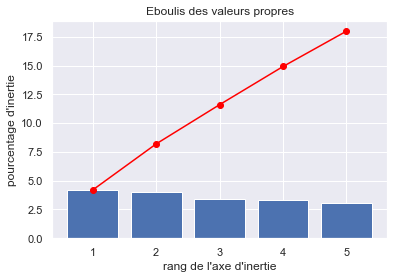

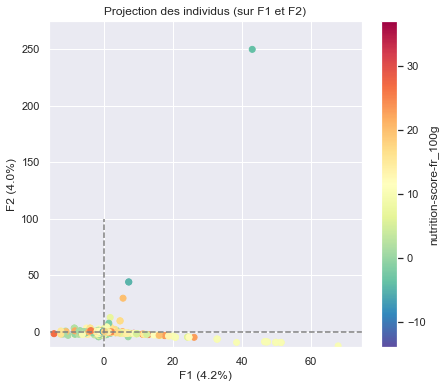

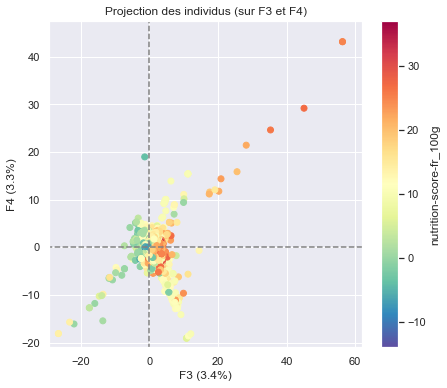

In [39]:
cols = colsOfType(df, ['float64','float32'])[:-3]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 5, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

6 cols: ['carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g']


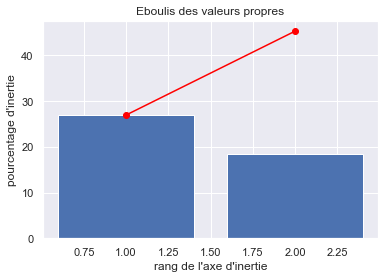

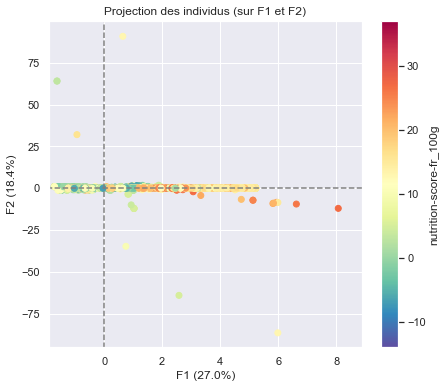

In [40]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ose' in col or col in ['carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = PCA_Compression(X, pcs, cols, 'glucids')

13 cols: ['energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'pantothenic-acid_100g']


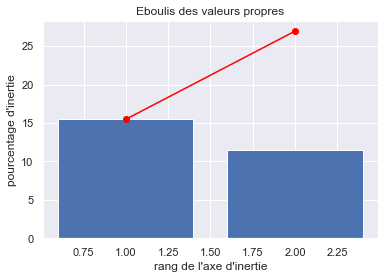

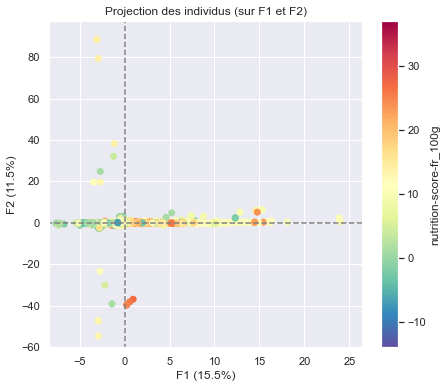

In [41]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'fat' in col or 'acid' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'fatcids')], axis=1)

8 cols: ['salt_100g', 'sodium_100g', 'potassium_100g', 'calcium_100g', 'magnesium_100g', 'fluoride_100g', 'selenium_100g', 'iodine_100g']


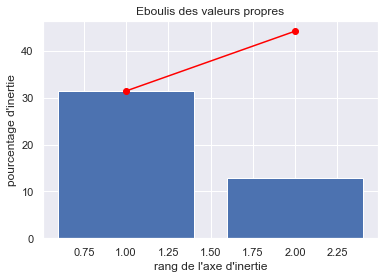

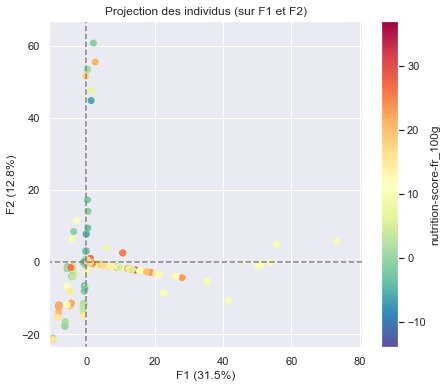

In [42]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if col in ['fluoride_100g', 'iodine_100g', 'salt_100g'] or 'ium' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'salt_minerals')], axis=1)

11 cols: ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


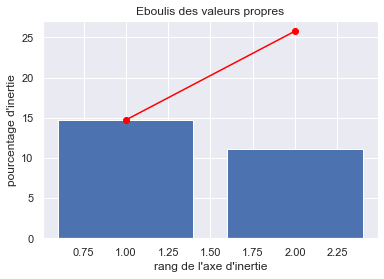

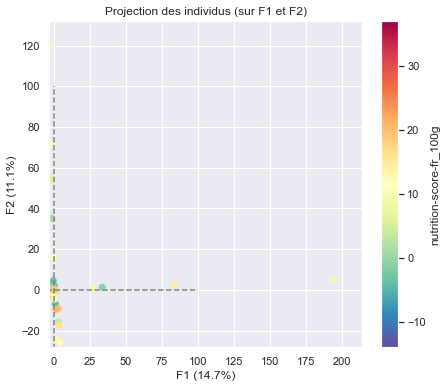

In [43]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'vitamin' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'vitamins')], axis=1)

27 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'cholesterol_100g', 'carbohydrates_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g']


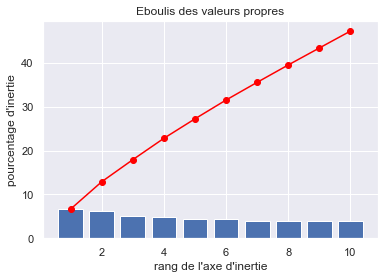

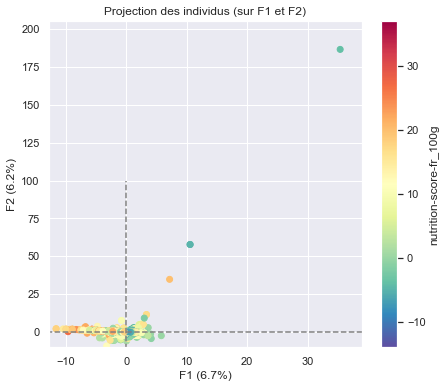

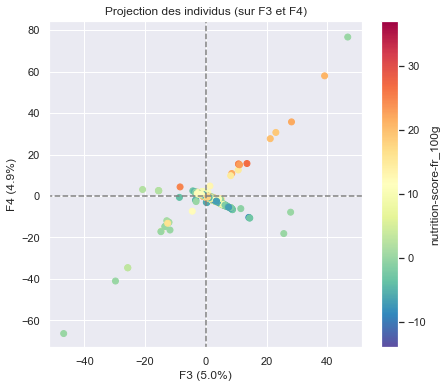

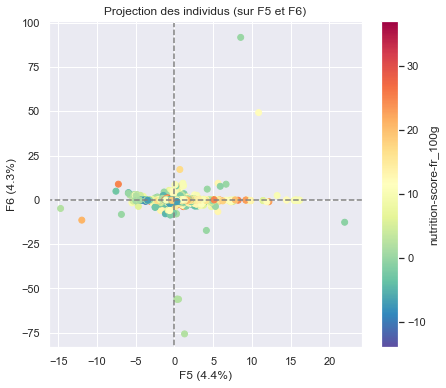

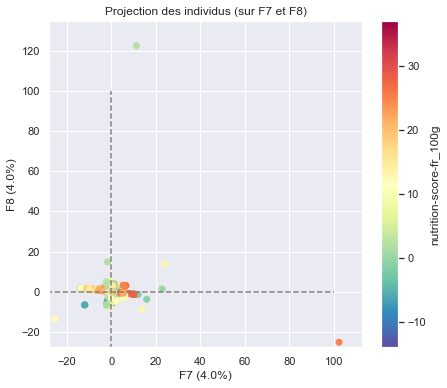

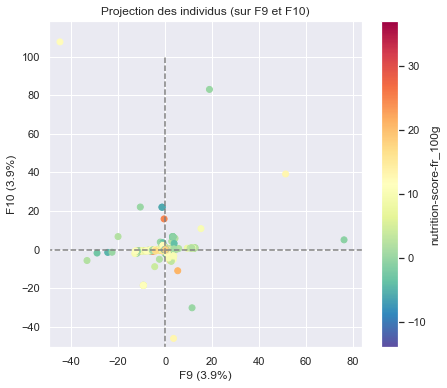

In [44]:
# Choix des colonnes à réduire
cols = colsOfType(df, ['float64','float32'])[:-3]
cols = [col for col in cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col and col not in ['fluoride_100g', 'iodine_100g', 'salt_100g''carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 10, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols)], axis=1)

In [45]:
compressed = pd.concat([compressed, X['nutrition-score-fr_100g']], axis=1)

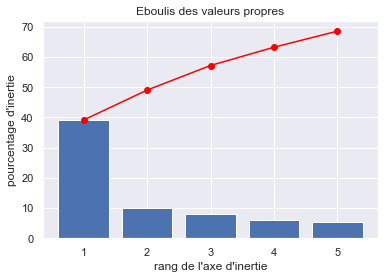

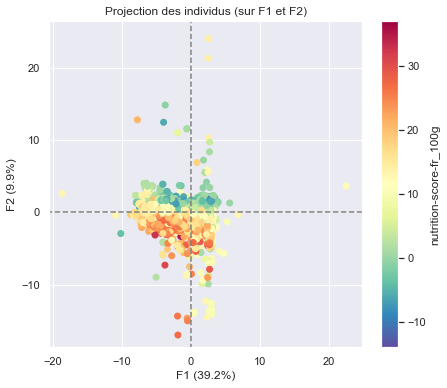

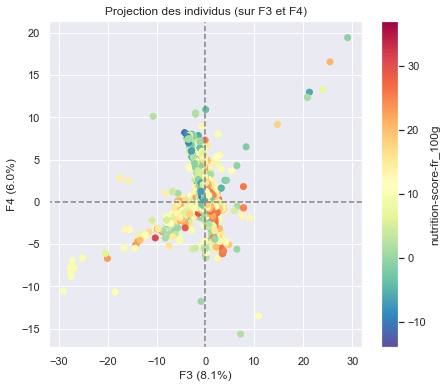

In [46]:
pcs = PCA(compressed, 5, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

In [47]:
compressed = pd.concat([PCA_Compression(X, pcs), X['nutrition-score-fr_100g']], axis=1)
compressed

,comp1,comp2,comp3,comp4,comp5,nutrition-score-fr_100g
304594,0.328402,-0.152135,-0.051952,-0.197979,-0.125918,11.0
205384,0.309198,-0.044741,0.063925,-0.077055,0.034237,17.0
296562,0.431923,-0.081130,0.017512,-0.256373,-0.133604,0.0
310297,0.210821,-0.003154,0.150887,-0.062898,0.018287,25.0
219843,0.321798,-0.132824,-0.061120,-0.180789,-0.118334,0.0
...,...,...,...,...,...,...
305992,0.502544,-0.024036,0.177289,-0.258776,-0.016517,11.0
20832,0.308840,-0.128254,-0.074506,-0.182770,-0.126343,-6.0
210341,0.211374,-0.308158,0.153578,-0.292047,-0.084122,11.0
207895,0.399359,-0.101351,0.039391,-0.266620,-0.133588,-7.0


In [48]:
# histo_distribution(compressed, horizontal=False)

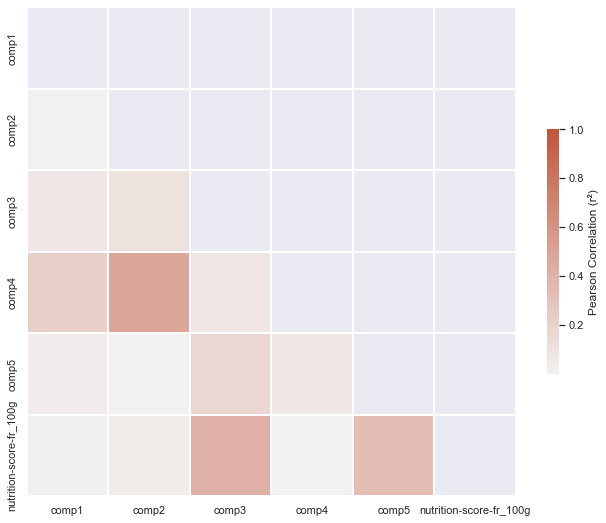

In [49]:
correlation_matrix(compressed)

## K-Means

In [50]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
data = compressed
n_clust = int(len(data)*0.2)
print('Original data size:', len(data), 'nb_clusters:', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

centroids = km_X.cluster_centers_ 

Original data size: 28890 nb_clusters: 5778


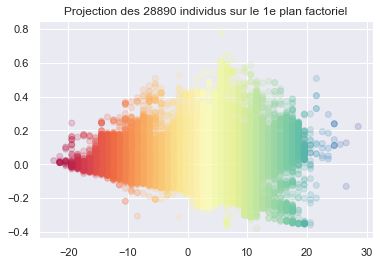

In [51]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=X[:, -1], cmap = sns.color_palette('Spectral', as_cmap=True), alpha=.2) # c=clusters.astype(np.float)
plt.title('Projection des {} individus sur le 1e plan factoriel'.format(X_projected.shape[0]))
plt.show(block=False)

## K-NN

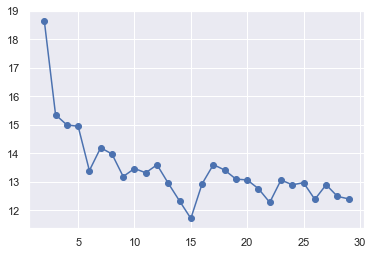

Best k=15, MSE=11.72%


In [52]:
from my_functions.knn_functions import *

data = pd.DataFrame(centroids, columns=compressed.columns)

mean_imputed_best_k, mean_imputed_min_error, mean_imputed_best_knn, mean_imputed_errors, mean_imputed_ks = best_knn(data, Y='nutrition-score-fr_100g', repeat_factor=100)
print('Best k=' + str(mean_imputed_best_k) + ', MSE=' + str(round(mean_imputed_min_error,2)) + '%')

# Multi-variate with Iterative Imputed Data

In [53]:
X = iter_imputed_data # knn_imputed_data.copy() # mean_imputed_data # iter_imputed_data
X, scaler = Std_Scaled(X, frame=True, return_scaler=True)
X['nutrition-score-fr_100g'] = knn_imputed_data['nutrition-score-fr_100g']

## PCA

In [54]:
from my_functions.pca_functions import *

63 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iro

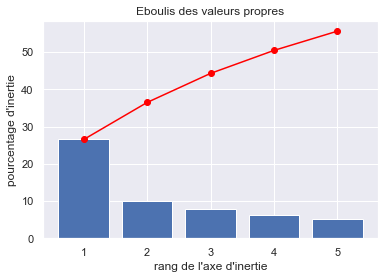

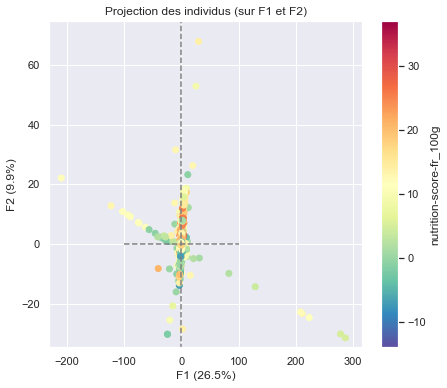

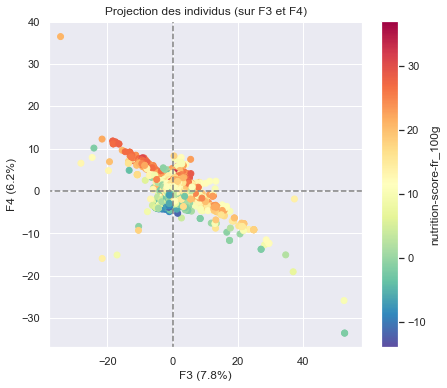

In [55]:
cols = colsOfType(df, ['float64','float32'])[:-3]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 5, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

6 cols: ['carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g']


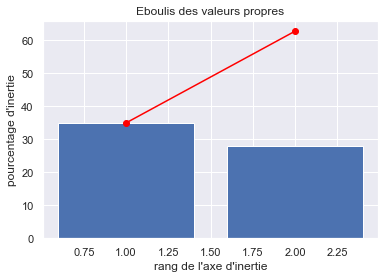

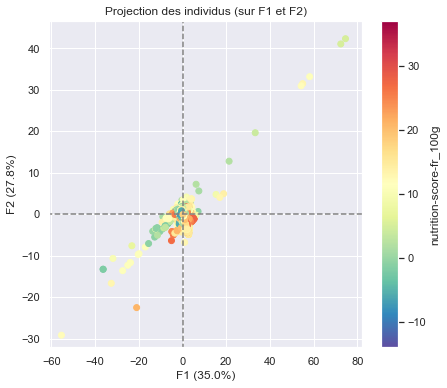

In [56]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ose' in col or col in ['carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = PCA_Compression(X, pcs, cols, 'glucids')

13 cols: ['energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'pantothenic-acid_100g']


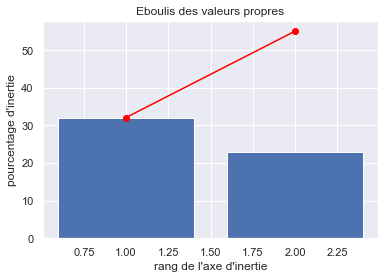

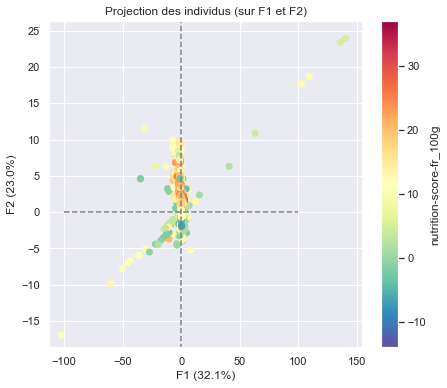

In [57]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'fat' in col or 'acid' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'fatcids')], axis=1)

8 cols: ['salt_100g', 'sodium_100g', 'potassium_100g', 'calcium_100g', 'magnesium_100g', 'fluoride_100g', 'selenium_100g', 'iodine_100g']


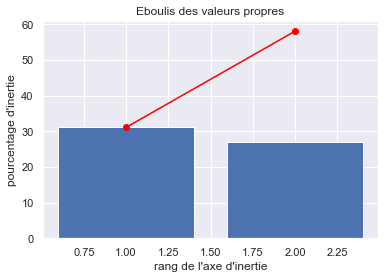

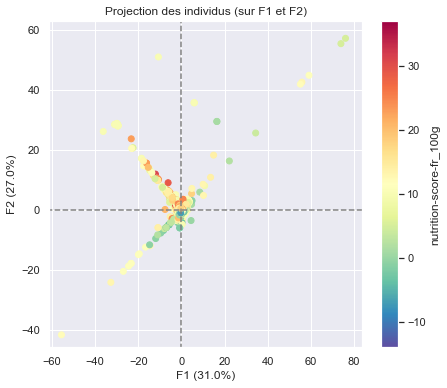

In [58]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if col in ['fluoride_100g', 'iodine_100g', 'salt_100g'] or 'ium' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'salt_minerals')], axis=1)

11 cols: ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


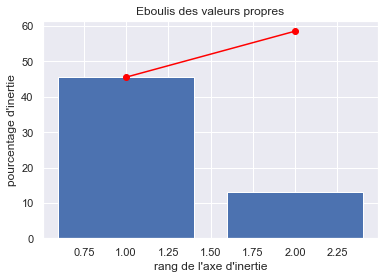

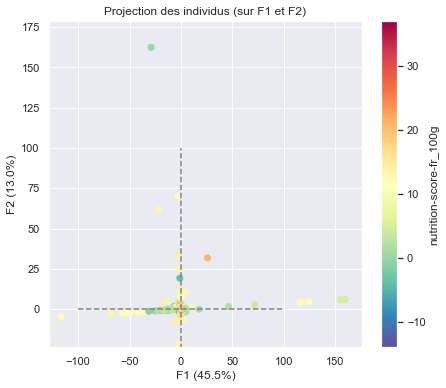

In [59]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'vitamin' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'vitamins')], axis=1)

27 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'cholesterol_100g', 'carbohydrates_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g']


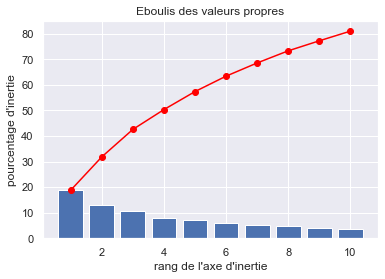

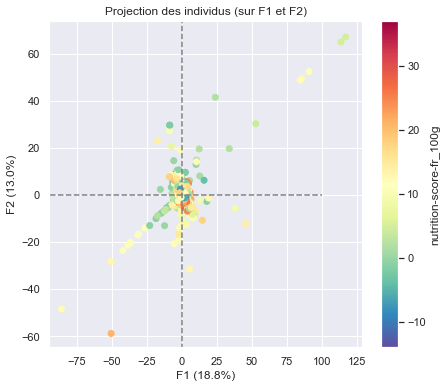

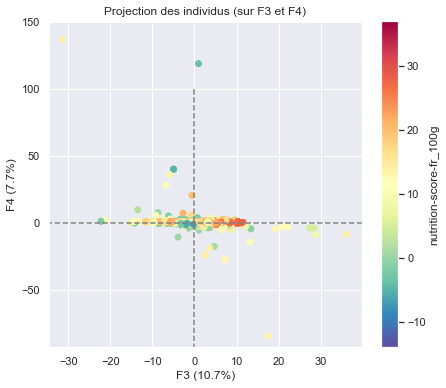

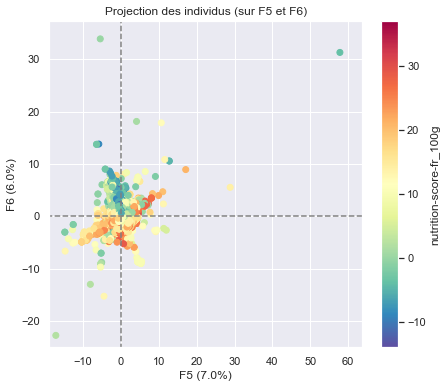

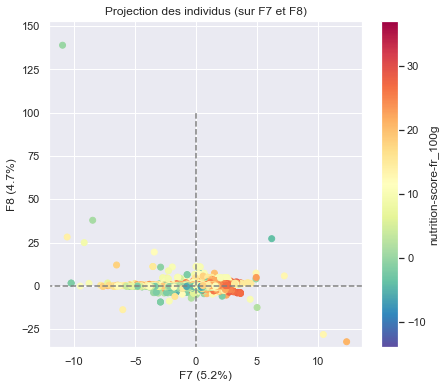

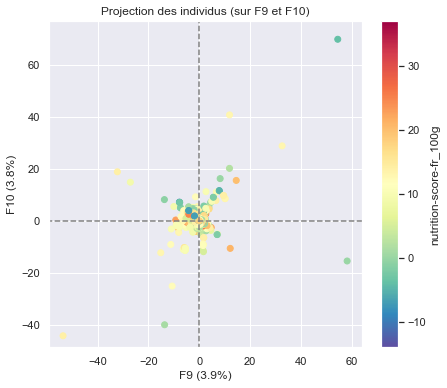

In [60]:
# Choix des colonnes à réduire
cols = colsOfType(df, ['float64','float32'])[:-3]
cols = [col for col in cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col and col not in ['fluoride_100g', 'iodine_100g', 'salt_100g''carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 10, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols)], axis=1)

In [61]:
compressed = pd.concat([compressed, X['nutrition-score-fr_100g']], axis=1)

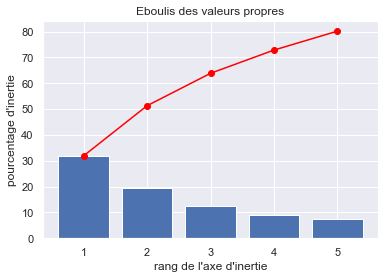

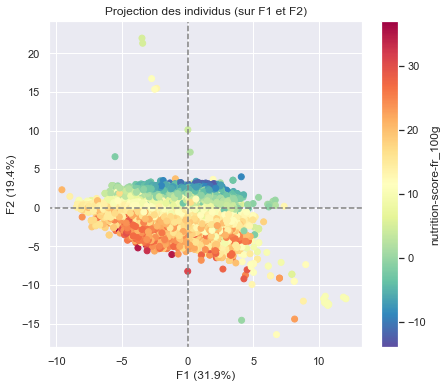

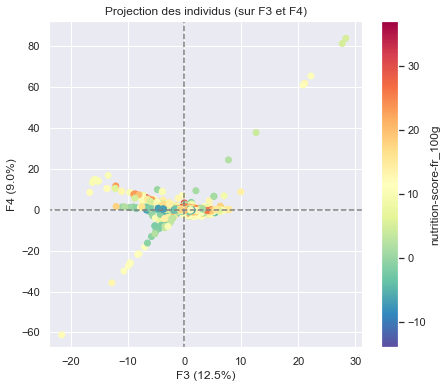

In [62]:
pcs = PCA(compressed, 5, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

In [63]:
compressed = pd.concat([PCA_Compression(X, pcs), X['nutrition-score-fr_100g']], axis=1)
compressed

,comp1,comp2,comp3,comp4,comp5,nutrition-score-fr_100g
304594,-0.263491,-0.103805,0.190693,0.355397,-0.369489,11.0
205384,-0.235973,-0.091796,0.239370,0.607462,-0.292720,17.0
296562,-0.204975,-0.106648,0.167873,0.377102,-0.452237,0.0
310297,-0.323959,-0.140398,0.260577,0.679846,-0.236512,25.0
219843,-0.266271,-0.085668,0.203191,0.370537,-0.356840,0.0
...,...,...,...,...,...,...
305992,-0.132690,-0.147707,0.153319,0.549807,-0.496975,11.0
20832,-0.283516,-0.079582,0.202468,0.359814,-0.356078,-6.0
210341,-0.407794,-0.170129,0.193329,0.550207,-0.399014,11.0
207895,-0.228953,-0.119250,0.170761,0.375859,-0.450351,-7.0


In [64]:
# histo_distribution(compressed, horizontal=False)

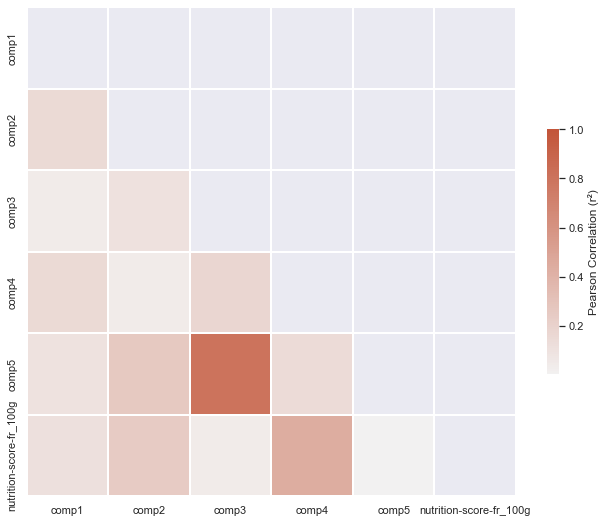

In [65]:
correlation_matrix(compressed)

## K-Means

In [66]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
data = compressed
n_clust = int(len(data)*0.2)
print('Original data size:', len(data), 'nb_clusters:', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

centroids = km_X.cluster_centers_ 

Original data size: 28890 nb_clusters: 5778


3.258295705128056


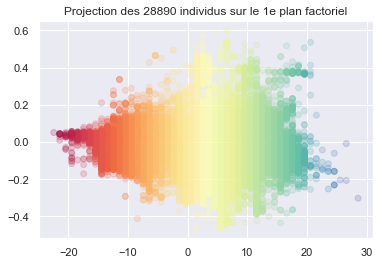

In [67]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
print(pca.score(X))
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=X[:, -1], cmap = sns.color_palette('Spectral', as_cmap=True), alpha=.2) # c=clusters.astype(np.float)
plt.title('Projection des {} individus sur le 1e plan factoriel'.format(X_projected.shape[0]))
plt.show(block=False)

## K-NN

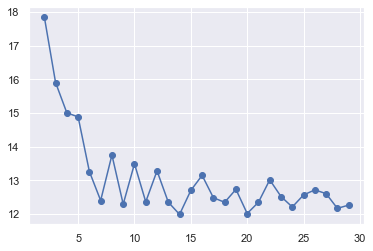

Best k=14, MSE=11.99%


In [68]:
from my_functions.knn_functions import *

data = pd.DataFrame(centroids, columns=compressed.columns)

iter_imputed_best_k, iter_imputed_min_error, iter_imputed_best_knn, iter_imputed_errors, iter_imputed_ks = best_knn(data, Y='nutrition-score-fr_100g', repeat_factor=100)
print('Best k=' + str(iter_imputed_best_k) + ', MSE=' + str(round(iter_imputed_min_error,2)) + '%')

# Multi-variate with Knn Imputed Data

In [69]:
X = knn_imputed_data # knn_imputed_data.copy() # mean_imputed_data # iter_imputed_data
X, scaler = Std_Scaled(X, frame=True, return_scaler=True)
X['nutrition-score-fr_100g'] = knn_imputed_data['nutrition-score-fr_100g']

## PCA

In [70]:
from my_functions.pca_functions import *

63 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g', 'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iro

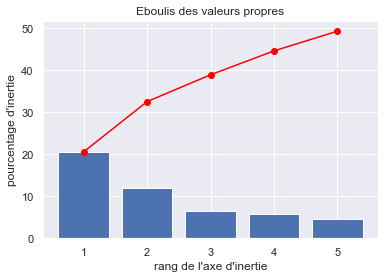

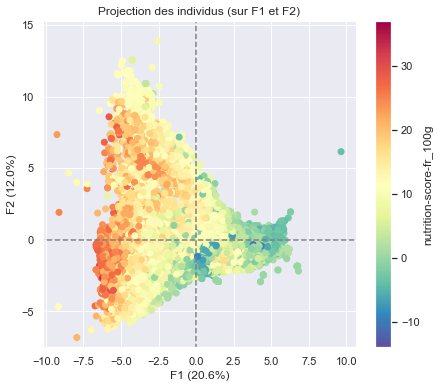

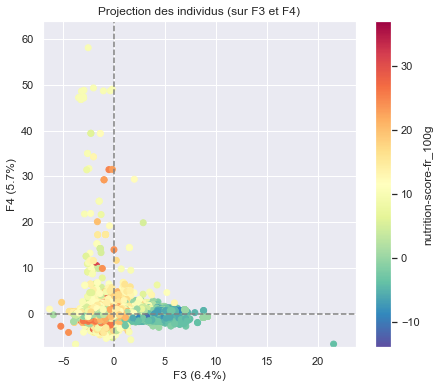

In [71]:
cols = colsOfType(df, ['float64','float32'])[:-3]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 5, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

6 cols: ['carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g']


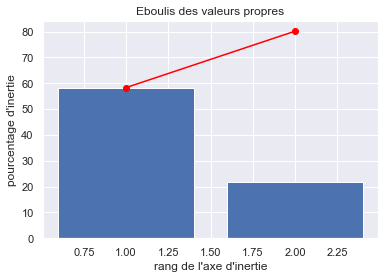

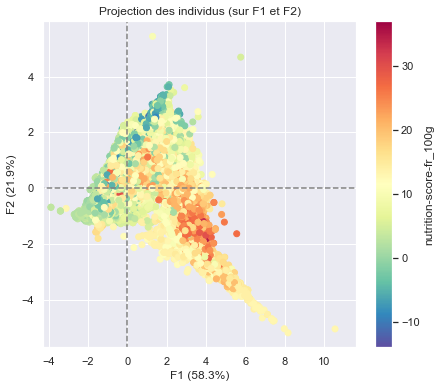

In [72]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ose' in col or col in ['carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = PCA_Compression(X, pcs, cols, 'glucids')

13 cols: ['energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'pantothenic-acid_100g']


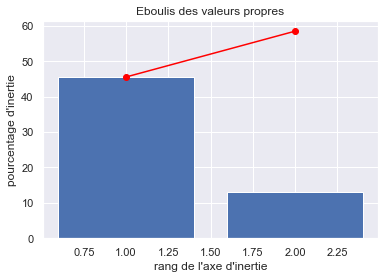

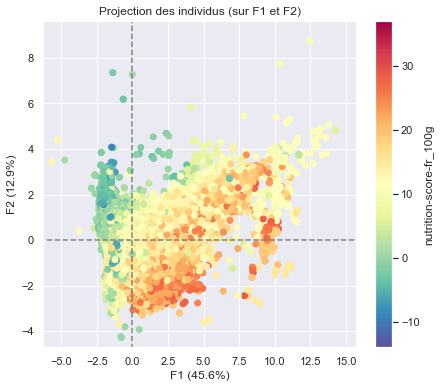

In [73]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'fat' in col or 'acid' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'fatcids')], axis=1)

4 cols: ['salt_100g', 'sodium_100g', 'fluoride_100g', 'iodine_100g']


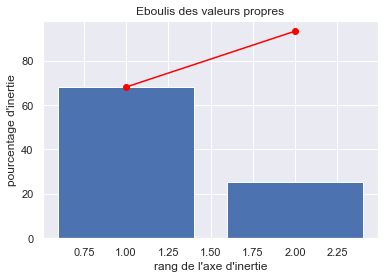

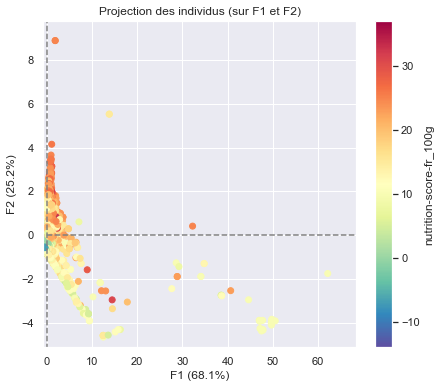

In [74]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if col in ['fluoride_100g', 'iodine_100g', 'salt_100g', 'sodium_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)
compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'salts')], axis=1)

11 cols: ['vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g']


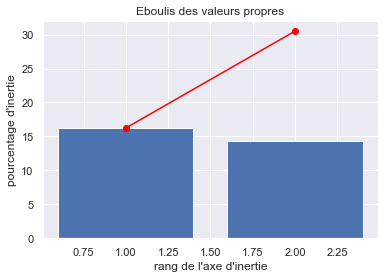

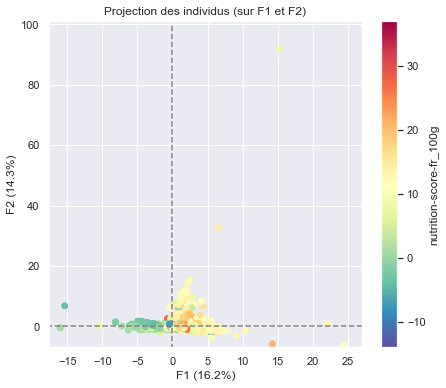

In [75]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'vitamin' in col]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'vitamins')], axis=1)

4 cols: ['potassium_100g', 'calcium_100g', 'magnesium_100g', 'selenium_100g']


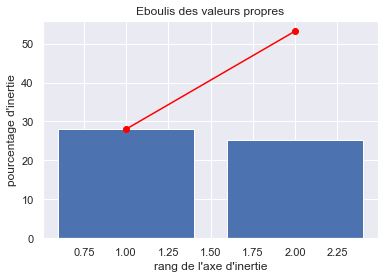

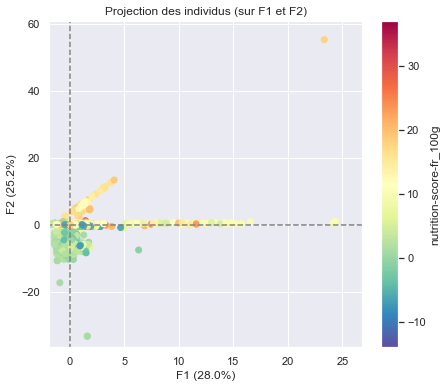

In [76]:
# Choix des colonnes à réduire
cols = [col for col in df.columns.tolist() if 'ium' in col and col!='sodium_100g']
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 2, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols, 'minerals')], axis=1)

27 cols: ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'cholesterol_100g', 'carbohydrates_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g']


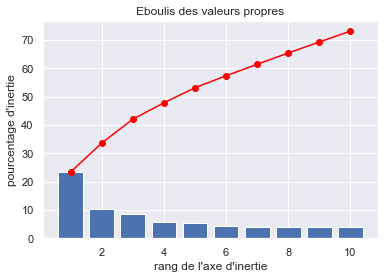

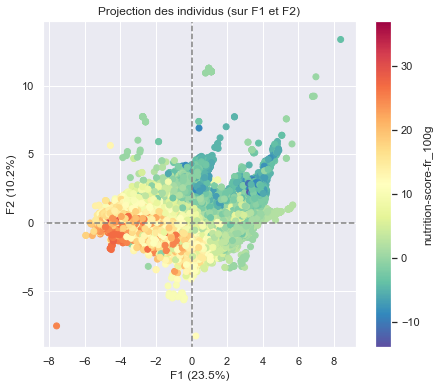

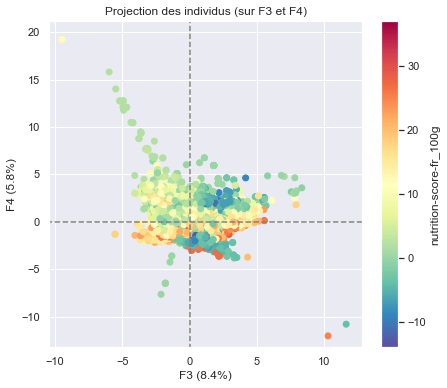

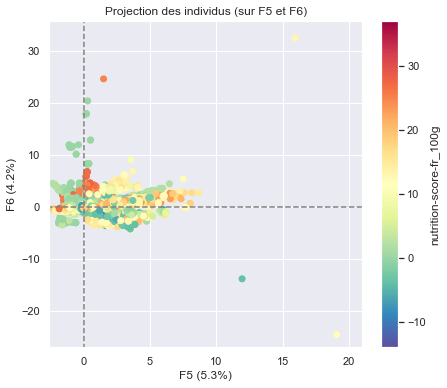

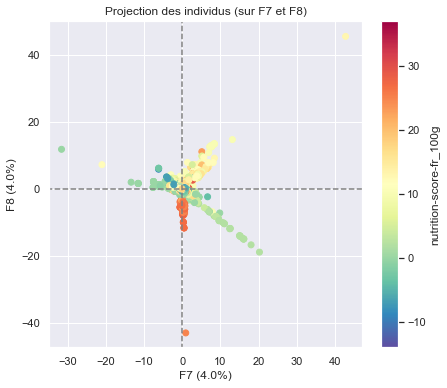

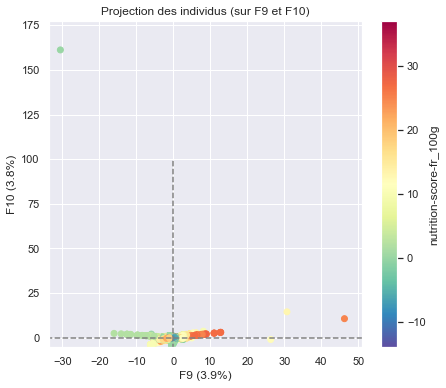

In [77]:
# Choix des colonnes à réduire
cols = colsOfType(df, ['float64','float32'])[:-3]
cols = [col for col in cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col and col not in ['fluoride_100g', 'iodine_100g', 'salt_100g''carbohydrates_100g', 'starch_100g', 'sugars_100g']]
print(len(cols), 'cols:',cols[:100])

pcs = PCA(X, 10, cols, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

compressed = pd.concat([compressed, PCA_Compression(X, pcs, cols)], axis=1)

In [78]:
compressed = pd.concat([compressed, X['nutrition-score-fr_100g']], axis=1)

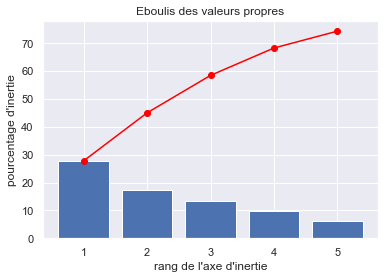

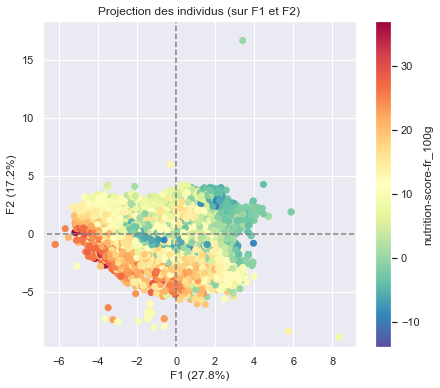

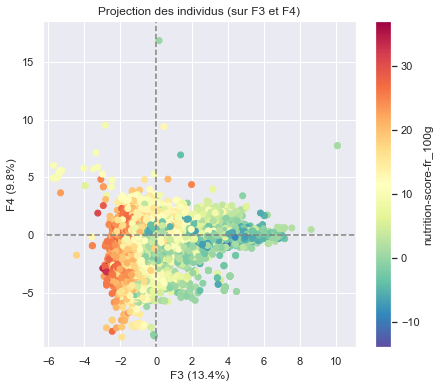

In [79]:
pcs = PCA(compressed, 5, continuous_illustrative_var=X['nutrition-score-fr_100g'], enable_display_circles=False)

In [80]:
compressed = pd.concat([PCA_Compression(X, pcs), X['nutrition-score-fr_100g']], axis=1)
compressed

,comp1,comp2,comp3,comp4,comp5,nutrition-score-fr_100g
304594,-0.083802,-0.061482,0.041091,0.240830,0.042791,11.0
205384,-0.114992,-0.278288,0.031528,0.238321,0.377342,17.0
296562,-0.015468,-0.013970,-0.105601,0.295730,0.060640,0.0
310297,-0.198126,-0.356529,0.067429,0.221119,0.430443,25.0
219843,-0.085172,-0.075980,0.006055,0.184049,0.015768,0.0
...,...,...,...,...,...,...
305992,-0.094282,-0.002814,-0.200208,0.434825,0.174460,11.0
20832,-0.094465,-0.063677,-0.000791,0.189890,0.004978,-6.0
210341,-0.305510,0.039410,-0.029746,0.394013,0.051294,11.0
207895,-0.026149,0.039736,-0.112373,0.294369,0.058808,-7.0


In [81]:
# histo_distribution(compressed, horizontal=False)

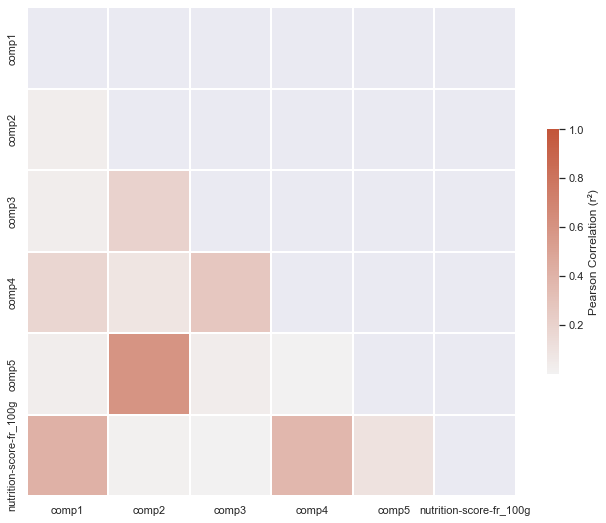

In [82]:
correlation_matrix(compressed)

## K-Means

In [83]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
data = compressed
n_clust = int(len(data)*0.2)
print('Original data size:', len(data), 'nb_clusters:', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

centroids = km_X.cluster_centers_ 

Original data size: 28890 nb_clusters: 5778


1.6548042339559337


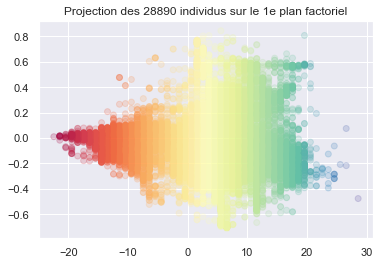

In [84]:
# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
print(pca.score(X))
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=X[:, -1], cmap = sns.color_palette('Spectral', as_cmap=True), alpha=.2) # c=clusters.astype(np.float)
plt.title('Projection des {} individus sur le 1e plan factoriel'.format(X_projected.shape[0]))
plt.show(block=False)

## K-NN

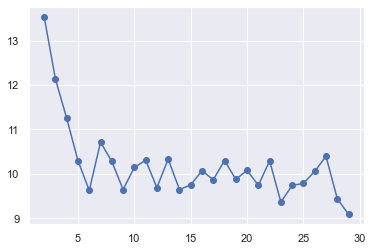

Best k=29, MSE=9.08%


In [85]:
from my_functions.knn_functions import *

data = pd.DataFrame(centroids, columns=compressed.columns)

knn_imputed_best_k, knn_imputed_min_error, knn_imputed_best_knn, knn_imputed_errors, knn_imputed_ks = best_knn(data, Y='nutrition-score-fr_100g', repeat_factor=100)
print('Best k=' + str(knn_imputed_best_k) + ', MSE=' + str(round(knn_imputed_min_error,2)) + '%')

## Comparison between the 3 imputed data KNN models

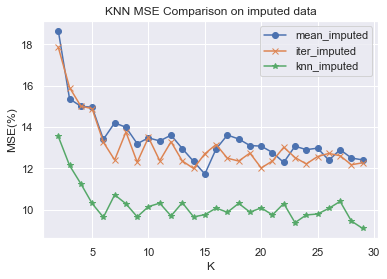

In [86]:
plt.plot(mean_imputed_ks, mean_imputed_errors, 'o-', label='mean_imputed')
plt.plot(iter_imputed_ks, iter_imputed_errors, 'x-', label='iter_imputed')
plt.plot(knn_imputed_ks, knn_imputed_errors, '*-', label='knn_imputed')
plt.legend()
plt.title('KNN MSE Comparison on imputed data')
plt.xlabel('K')
plt.ylabel('MSE(%)')
plt.show()